<a href="https://colab.research.google.com/github/KrushnaChaure/NYC-Taxi-Trip-Time-Prediction/blob/main/Krushna_Chaure_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - NYC Taxi Trip Time Prediction**

**Project Type** - Regression

**Contribution** - Individual 

# **Problem Statement**

Our task is to build a machine learning model that predicts the total ride duration of taxi trips in New York City. Our primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.


# **Lets Begin & Kick start our journy**

## **1. Know Our Data**

### Import Libraries

In [ ]:
#Install Library  use to calculate the haversine distance 

!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing necessary libraries for our project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as math
import warnings
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')
from haversine import haversine
from datetime import datetime
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
%matplotlib inline
import xgboost
import datetime as dt
# Importing Machine Learning Libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

### Dataset Loading


In [ ]:
# Firstly we mount the drive over this colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Here we connecting & importing the dataset over this colab notebook
dataset= pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4/NYC Taxi Trip Time Prediction - Krushna Chaure/NYC Taxi Data.csv')

### Dataset First View

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,<bound method PandasDelegate._add_delegate_acc...,3,0,17,1.498523,11.856445
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,<bound method PandasDelegate._add_delegate_acc...,6,6,0,1.805510,9.803672
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,<bound method PandasDelegate._add_delegate_acc...,1,1,11,6.385107,10.822216
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,<bound method PandasDelegate._add_delegate_acc...,4,2,19,1.485500,12.465738
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,<bound method PandasDelegate._add_delegate_acc...,3,5,13,1.188590,9.836608


### Dataset Rows & Columns count

In [ ]:
# For finding how many rows & columns in our dataset
dataset.shape

(1458644, 11)

### Dataset Information

In [ ]:
# For finding information about our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


### Duplicate Values

In [ ]:
# Here we checking duplicate values in our dataset
len(dataset[dataset.duplicated()])

0

### Missing Values/Null Values

In [ ]:
# For checking NAN or Misssing/Null values in our dataset
print(dataset.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


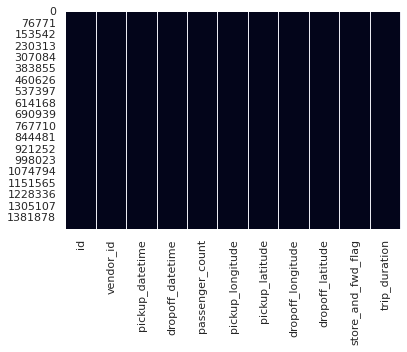

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### Understanding and Found some information about our dataset

The dataset given is dataset which is get from NYC Taxi and Limousine commission and we have to analysis total ride duration of taxi trips in new york city.

Our goal is to analysis different factors which affects taxi trip ride duration and by considering factors our end goal is to predict precise trip duration.

The above dataset has 1458644 rows and 11 columns. There are no mising values and duplicate values in the dataset.

## **2. Now understanding the variables available in dataset** 

In [ ]:
# Dataset column name
dataset.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# Dataset description
dataset.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


From above decription of Dataset we can see that passenger_count varies from 0 to 9.

Trip_duration has max value of 3526282 seconds which is almost 979.5 hours and minimum value 1 second.

This is exactly outlier present so this affect badly our prediction, our prediction not come precisly so thats why we want to remove this outliers. 

### Variables Description

**Independent variable:-**

*   **id** - Unique identifier for each trip.
*   **vendor_id** - Code indicating the provider associated with the trip record.



*   **pickup_datetime** - Date and Time when the meter was engaged.

*   **dropoff_datetime** - Date and Time when the meter was disengaged.

*   **passenger_count** - The number of passengers in the vehicle (driver entered value)

*   **pickup_longitude** - The longitude where the meter was engaged.
*   **pickup_latitude** - The latitude where the meter was engaged.


*   **dropoff_longitude** - The longitude where the meter was disengaged.




*   **dropoff_latitude** - The latitude where the meter was disengaged.


*   **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

**Dependent or Target variable:-**


*   **trip_duration** - Duration of the trip in seconds.






Now we are Categorizing the Independent variable :

Let's divide Independent variable into categories:


*   *Geographical:* pickup_longitude , pickup_latitude , dropoff_longitude , dropoff_latitude.
*   *Time related:* pickup_datetime, dropoff_datetime.

*   *Identifier:* id(not useful for analysis)
*   *Others:* vendor_id, passenger_count, store_and_fwd_flag. 



### Checking Unique Values for each variable in dataset

In [ ]:
# For checking unique values in each column
for i in dataset.columns.tolist():
  print('No. of unique values in ',i,'is',dataset[i].nunique())

No. of unique values in  id is 1458644
No. of unique values in  vendor_id is 2
No. of unique values in  pickup_datetime is 1380222
No. of unique values in  dropoff_datetime is 1380377
No. of unique values in  passenger_count is 10
No. of unique values in  pickup_longitude is 23047
No. of unique values in  pickup_latitude is 45245
No. of unique values in  dropoff_longitude is 33821
No. of unique values in  dropoff_latitude is 62519
No. of unique values in  store_and_fwd_flag is 2
No. of unique values in  trip_duration is 7417


## **3. Data Wrangling**

In [ ]:
dataset[dataset['passenger_count']==0].count()

id                    60
vendor_id             60
pickup_datetime       60
dropoff_datetime      60
passenger_count       60
pickup_longitude      60
pickup_latitude       60
dropoff_longitude     60
dropoff_latitude      60
store_and_fwd_flag    60
trip_duration         60
dtype: int64

### Converting datatype

In [ ]:
# Converting timestamp to datetime format to fetch the other details as listed below.
dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime'])
dataset['dropoff_datetime'] = pd.to_datetime(dataset['dropoff_datetime'])
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Add new columns in dataset

In [ ]:
#Calculate and assign new columns to the dataframe such as weekday,month and pickup_hour which will help us to gain more insights from the data.
dataset['weekday'] = dataset.pickup_datetime.dt.day_name
dataset['month'] = dataset.pickup_datetime.dt.month
dataset['weekday_num'] = dataset.pickup_datetime.dt.weekday
dataset['pickup_hour'] = dataset.pickup_datetime.dt.hour

### Create Functions

In [ ]:
# Create the calc_distance function to calculate distance between pickup and dropoff coordinates using Haversine formula.
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [ ]:
# Calculating distance and assign new column to the dataframe with the help of lambda function.
dataset['distance'] = dataset.apply(lambda x: calc_distance(x), axis = 1)

In [ ]:
# Calculating Speed in km/h for further insights.
dataset['speed'] = (dataset.distance/(dataset.trip_duration/3600))

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,<bound method PandasDelegate._add_delegate_acc...,3,0,17,1.498523,11.856445
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,<bound method PandasDelegate._add_delegate_acc...,6,6,0,1.805510,9.803672
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,<bound method PandasDelegate._add_delegate_acc...,1,1,11,6.385107,10.822216
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,<bound method PandasDelegate._add_delegate_acc...,4,2,19,1.485500,12.465738
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,<bound method PandasDelegate._add_delegate_acc...,3,5,13,1.188590,9.836608


Now our dataset is complete for the further analysis before we train our model with optimal variables.

## **4. EDA, Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### Univariate Analysis

Univariate analysis explores each variable in a data set, separately. 

Uni means one, so in other words the data has only one variable. Univariate data requires to analyze each variable separately. 

It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.

Now Below is some variables which we doing analysis over them:- 

#### 1. Trip Duration

[Text(0.5, 1.0, 'Distribution Plot with Log Transformation for Trip Duration')]

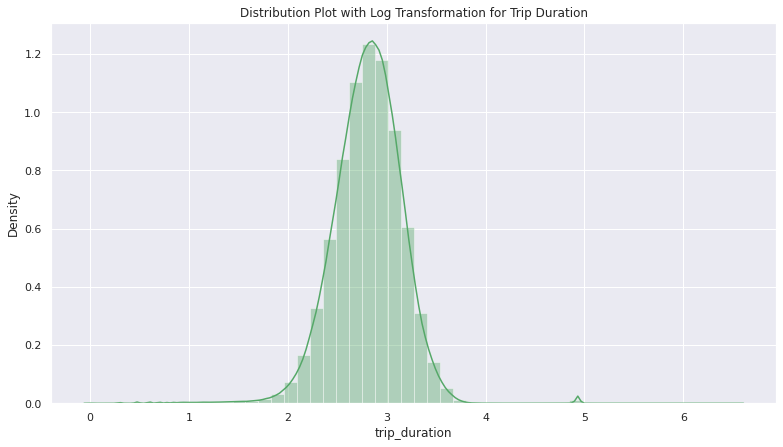

In [ ]:
# Analysing distribution of trip duration with the help of np.log10
plt.figure(figsize=(13,7))
sns.distplot(np.log10(dataset['trip_duration']),color="G").set(title='Distribution Plot with Log Transformation for Trip Duration')

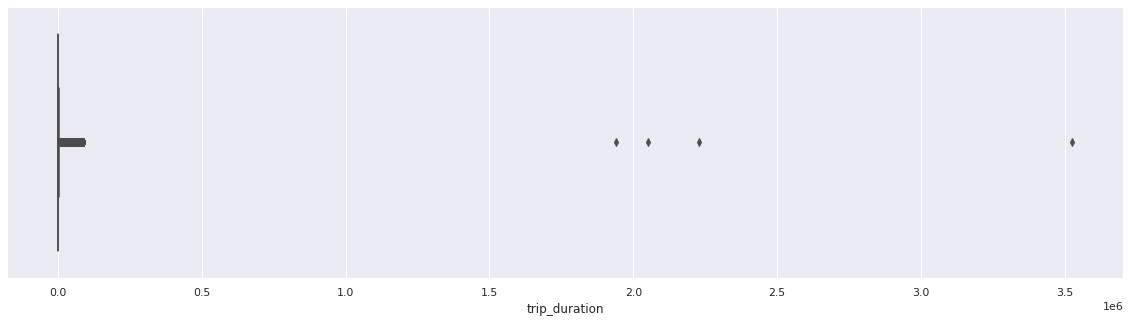

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(dataset.trip_duration)
plt.show()

From above boxplot and distplot:-


*   Some rides durations are over 100000 seconds which are clearly outliers and should be removed.
*   There are some rides which took 1 sec duration to complete which is 0 km/hr.

*   Major trip durations took between 10-20 mins to complete.








In [ ]:
# Understand how many rides completed in different ranges 
dataset['trip_duration'].groupby(pd.cut(dataset['trip_duration'], np.arange(1,max(dataset['trip_duration']),3600))).count()

trip_duration
(1, 3601]             1446313
(3601, 7201]            10045
(7201, 10801]             141
(10801, 14401]             35
(14401, 18001]              5
                       ...   
(3506401, 3510001]          0
(3510001, 3513601]          0
(3513601, 3517201]          0
(3517201, 3520801]          0
(3520801, 3524401]          0
Name: trip_duration, Length: 979, dtype: int64

There are some rides with more than 24 hours of travel duration i.e. 86400 seconds. Which might have occured on weekends for the outstation travels.

In [ ]:
# Removing rides over 86400 sec
dataset = dataset[dataset.trip_duration <= 86400]

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

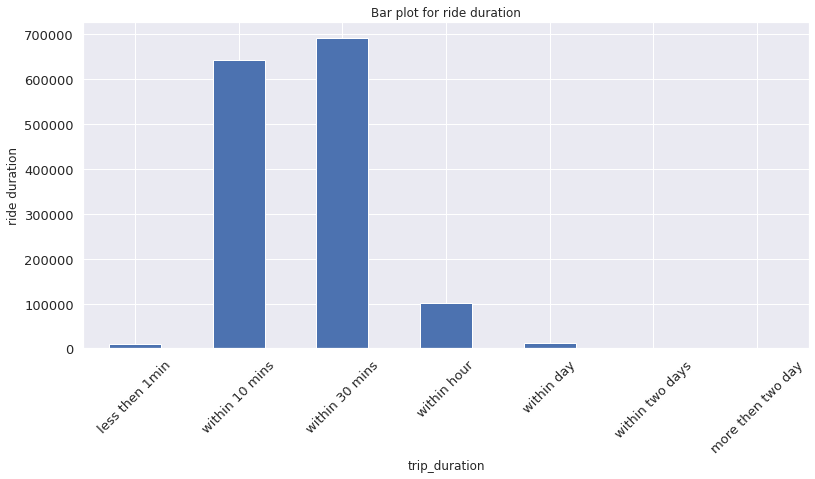

In [ ]:
# Lets visualize trip duration with more effective way like range of duration to complete the rides
plt.figure(figsize=[13,6])
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']
dataset.groupby(pd.cut(dataset['trip_duration'],bins=[0,60,600,1800,3600,86400,86400*2,10000000],labels=labels))['trip_duration'].count().plot(kind='bar',fontsize=13)
plt.title("Bar plot for ride duration")
plt.ylabel("ride counts")
plt.ylabel("ride duration")
plt.xticks(rotation=45)

From above bar plot:-

*   Most of the rides completed within 10 to 30 minutes



#### 2. Vendor Id

Here we analyze taxi data only for the 2 vendors which are listed as 1 and 2 in the datset.

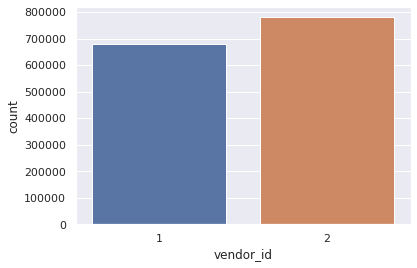

In [ ]:
sns.countplot(dataset.vendor_id)
plt.show()


From above countplot we can see that both vendors have good and nearly same market but vendor 2 have more market compare to 1

#### 3. Passenger Count

Here we analyze that how many passenger ride in their single ride.

means during booking of ride how much customer seated in that ride.

New York City Taxi Passenger limit and rule says:


*   A maximum of 4 passengers can ride in traditional cabs, there are also 5 passenger cabs that look more like minivans.
*   A child under 7 is allowed to sit on a passenger's lap in the rear seat in addition to the passenger limit.

*   So, in total we can assume that maximum 6 passenger can board the new york taxi i.e. 5 adult + 1 minor


In [ ]:
# Finding how many customer in each ride with the help of value counts
dataset.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

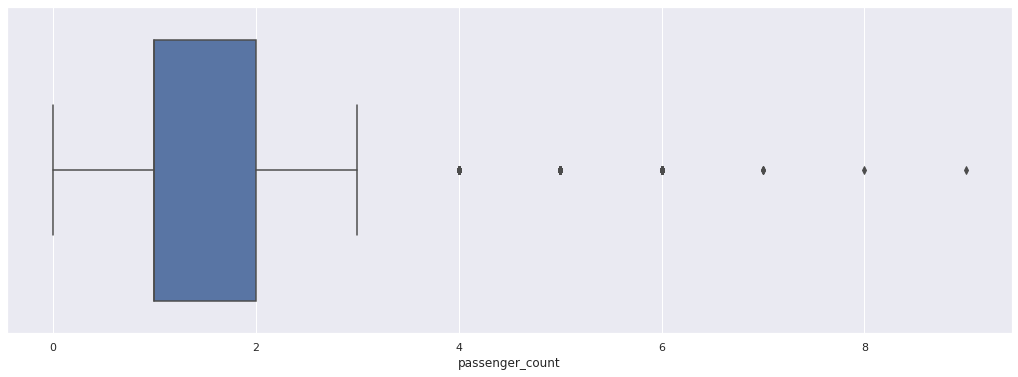

In [ ]:
# With the help of box plot we see outlier present  
plt.figure(figsize = (18,6))
sns.boxplot(dataset.passenger_count)
plt.show()


From above boxplot and value counts method we find that:-


*   There are 60 rides with 0 passenger but passenger count is driver entered value and it is common sense passenger without rides not possible so during this rides i think driver forget to enter passenger count so we replace this 0 passenger with 1.
*   There are only 3 rides with 7 passenger, 1 rides with 9 passenger, 1 rides with 8 passenger so this is outlier.

*   So we want to remove this outlier because its affect our further analysis. 
*   Most of the rides done with 1 & 2 passenger.





In [ ]:
# Remove the outlier where passenger count greater than 6 removed
dataset = dataset[dataset.passenger_count <= 6]
dataset['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
Name: passenger_count, dtype: int64

In [ ]:
# Replace 0 passenger with 1
dataset['passenger_count'] = dataset.passenger_count.apply(lambda x: 1 if x == 0 else x)

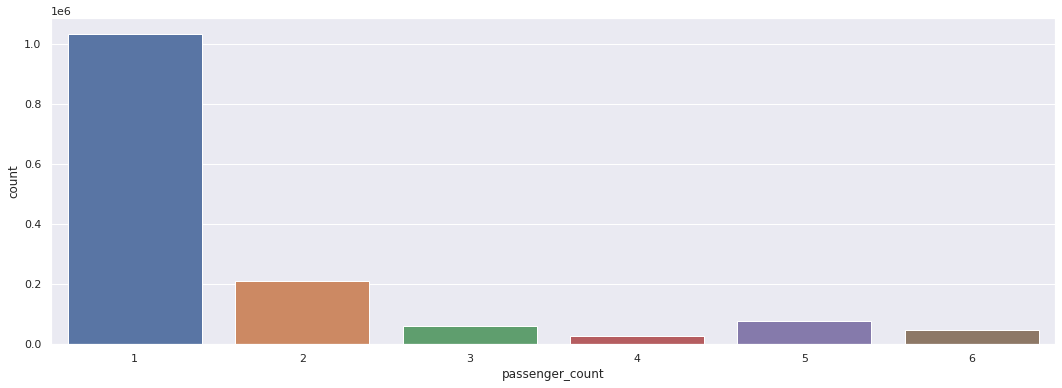

In [ ]:
plt.figure(figsize = (18,6))
sns.countplot(dataset.passenger_count)
plt.show()

From above countplot:-


*   Most of the rides are done with 1 passenger
*   Less number of rides done with 3,4,5,6 number of passenger

*   Most of the rides done with 2 passenger after single passenger. 





#### 4. Speed

Here we analyze the speed with different rides.

Speed is function and measure of distance per unit time.

Maximum speed limit in NYC is as follows:

*   25 mph in urban area i.e. 40 km/h
*   65 mph on controlled state highways i.e. approx 104 km/h


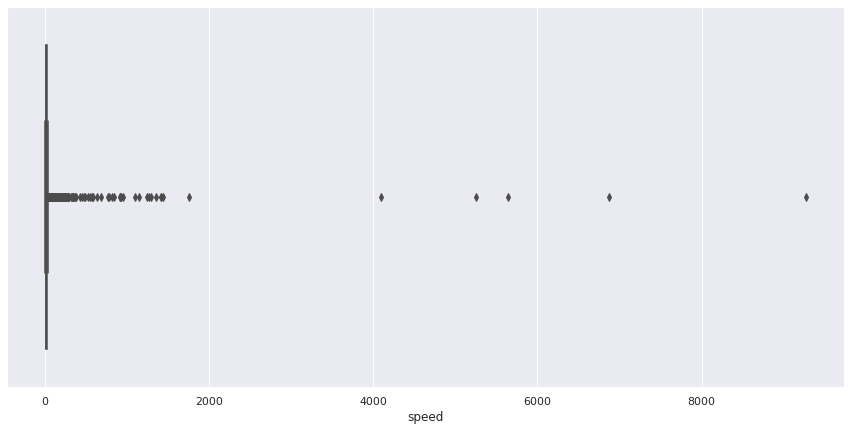

In [ ]:
# For detecting outlier with the help of visulaization of boxplot
plt.figure(figsize = (15,7))
sns.boxplot(dataset.speed)
plt.show()

From above boxplot:-

*   Many rides of the speed of taxi over 200 km/hr which clearly shows that outlier. 
*   so we want to remove that over speed and analyse the speed upto 104 km/hr as per speed limit.



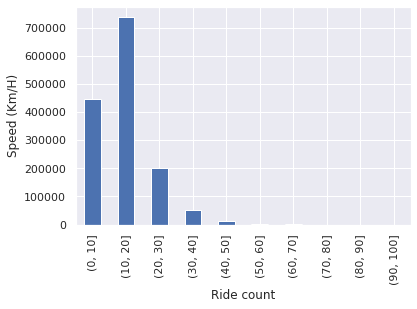

In [ ]:
# Analyse the rides with different speeds ranges.
dataset['speed'].groupby(pd.cut(dataset['speed'], np.arange(0,104,10))).count().plot(kind = 'bar')
plt.xlabel('Ride count')
plt.ylabel('Speed (Km/H)')
plt.show()

From above bar plot:-

*   Most of the rides speed have 10 to 20 km/hr
*   Some rides speed between upto 10 km/hr



#### 5. Distance

Now understand the how much distance takes by different rides. by means we see distribution of distance.

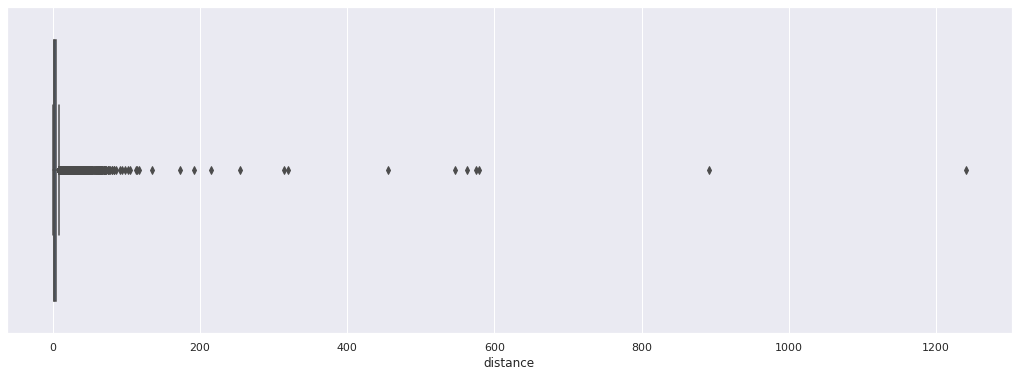

In [ ]:
# Check distribution of distance and outlier present in that
plt.figure(figsize = (18,6))
sns.boxplot(dataset.distance)
plt.show()

From above box plot:-

*   There are some rides which is over 100 miles i.e. 160.93 km 
*   There are some rides which is 0 miles i.e. 0 km

So 0 miles i.e. 0 km/hr comes when there are some possible scenario:-

*   Either there are some technical issue that GPS problem, software problem
*   Neither there are some human mind issue like passenger want to cancelled rides just after booking, driver cancelled rides just after accepting.

So we try to find that how many 0 distance rides.

In [ ]:
# Find how many 0 distance rides
dataset.distance[dataset['distance']==0].count()

5897

There are 5897 rides which is 0 miles i.e. 0 km

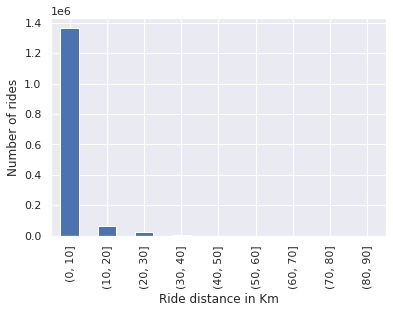

In [ ]:
# Find range of distance for different ride
dataset.distance.groupby(pd.cut(dataset.distance, np.arange(0,100,10))).count().plot(kind='bar')
plt.xlabel('Ride distance in Km')
plt.ylabel('Number of rides')
plt.show()

From above bar plot:-

*   Mostly the ride taken between 1 to 10 km.
*   Most of the ride taken between 0 to 30 km.



#### 6. Store and Forward flag

Here we analysis that This the ride record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

([<matplotlib.patches.Wedge at 0x7f66c4851dc0>,
 [Text(-1.099834877953519, 0.01905888866037148, ''),
  Text(1.099834877953519, -0.01905888866037113, '')],
 [Text(-0.5999099334291921, 0.010395757451111716, '99.4%'),
  Text(0.5999099334291921, -0.010395757451111523, '0.6%')])

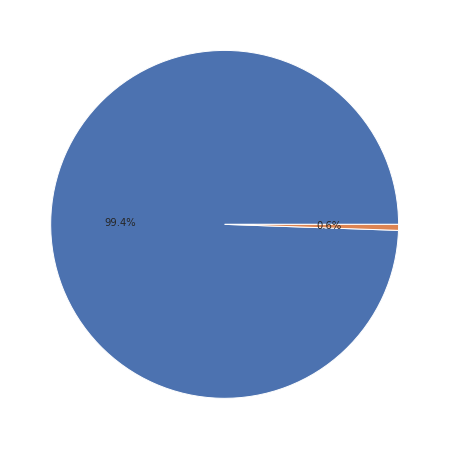

In [ ]:
# To know percentage of Y and N
plt.figure(figsize = (18,8))
plt.pie(dataset.store_and_fwd_flag.value_counts(),autopct='%1.1f%%')

Above pie chart:- 


*   shows that only about 0.6% of the ride details were stored in the vehicle first before sending it to the server.

*   shows that 99.4% of the ride details were not stored in the vehicle first before sending it to the server.





In [ ]:
# How many values 
dataset.store_and_fwd_flag.value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64



*   Its shows that only 8045 ride details were stored in the vehicle first before sending it to the server.
*   shows that 1450599 of the ride details were not stored in the vehicle first before sending it to the server.



#### 7. Total rides Per Hour

Lets analyse the distribution of total rides in 1 hours

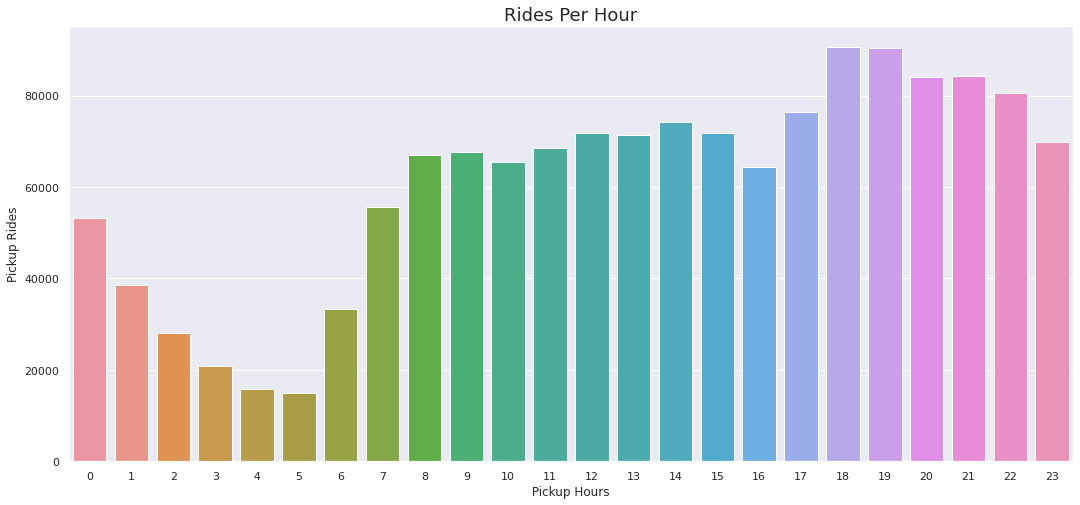

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(dataset.pickup_hour)
plt.xlabel(' Pickup Hours ')
plt.ylabel('Pickup Rides')
plt.title('Rides Per Hour',fontsize = 18)
plt.show()

From above countplot:-

*   It's inline with the general trend of taxi pickups which starts increasing from 6AM in the morning and then declines from late evening i.e. around 8 PM. There is no unusual behavior here.



#### Total rides Per Weekday

Here we analyse the distribution of total rides per weekday.

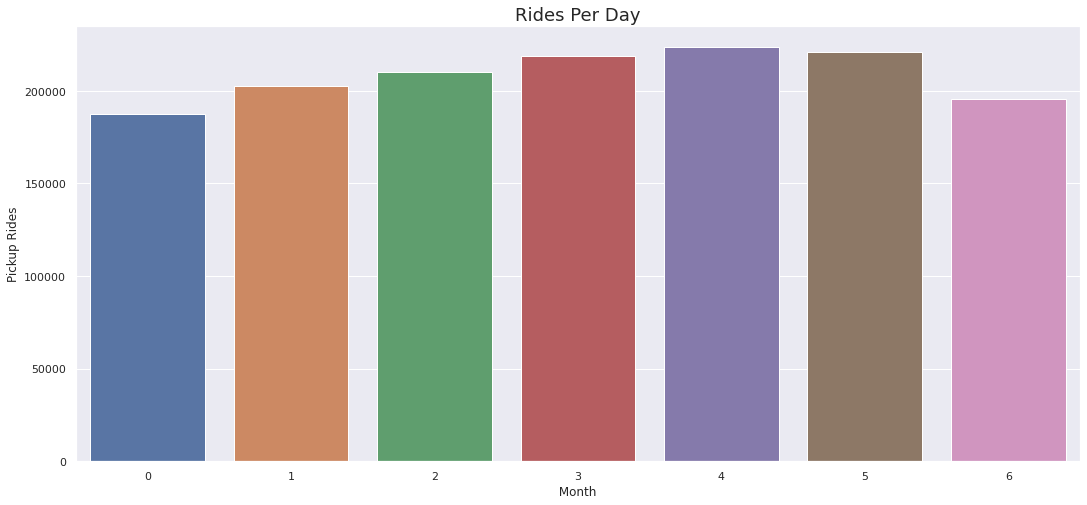

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(dataset.weekday_num)
plt.xlabel(' Month ')
plt.ylabel('Pickup Rides')
plt.title('Rides Per Day',fontsize = 18)
plt.show()

From above countplot:-

*   Here we can see an gradually increasing trend of taxi pickups starting from Monday till Friday. The trend starts declining from saturday till monday which is normal where some office going people likes to stay at home for rest on the weekends.



#### Total rides Per Month

Here we analyse the distribution of total rides per month.

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(dataset.month)
plt.ylabel('Pickup Rides')
plt.xlabel('Pickup Months')
plt.title('Rides Per Month',fontsize = 18)
plt.show()

From above countplot:-

*   Quite a balance across the months here. It could have been more equivalent if we wouldn't have removed the inconsistent records in our study of the univariate analysis



### Bivariate Analysis

Bivariate analysis is one of the statistical analysis where two variables are observed. 

One variable here is dependent while the other is independent.

here we analyse the changes occured between the two variables and to what extent.

Now Below is some variables which we doing analysis over them:-

In [ ]:
trip_biv=dataset.iloc[:,13:16].append(dataset['vendor_id'])
trip_biv

In [ ]:
for col in trip_biv:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['price'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

## **5. Hypothesis Testing**

## **6. Feature Engineering & Data Pre-processing**

## **7. ML Model Implementation**

## **Conclusion**